In [1]:
import pandas as pd
import pickle

In [2]:
#import
df = pickle.load(open( '../00_data/cleaned/sitzungssummary.pkl','rb') )
xmlsaetze = pickle.load(open( '../00_data/cleaned/xmlsaetze.pkl','rb') )


In [3]:
# Sitzungen / Schueler
print('Anzahl Sitzungen')
print(len(df))
print('----')

print('Anzahl User')
print(len(df.UserID.unique()))
print('----')

print('Anzahl schueler pro interventiongroup')
s = df.groupby(['interventiongroup'])['UserID'].count()
print(s)
print('----')



Anzahl Sitzungen
42147
----
Anzahl User
12193
----
Anzahl schueler pro interventiongroup
interventiongroup
2          6656
3          6821
4          6511
5          6634
6          6975
control    8550
Name: UserID, dtype: int64
----


In [4]:
print('Anzahl sitzungen pro interventiongroup')
s = df.groupby(['interventiongroup'])['UebungsID'].count()
print(s)
print('----')


Anzahl sitzungen pro interventiongroup
interventiongroup
2          6656
3          6821
4          6511
5          6634
6          6975
control    8550
Name: UebungsID, dtype: int64
----


In [5]:
print("Anzahl Sitzungen pro User")
s = df.groupby(['UserID'])['UebungsID'].count()
print(s)

Anzahl Sitzungen pro User
UserID
186923     6
360974     1
373836     1
409463     1
435839     2
          ..
1063303    1
1063461    1
1063470    1
1063918    3
1064116    8
Name: UebungsID, Length: 12193, dtype: int64


In [6]:
#xmlsaetze
print('Anzahl XMLSaetze')
print(len(xmlsaetze))
print('----')

print('Anzahl User')
print(len(xmlsaetze.UserID.unique()))
print('----')

print('Anzahl Sitzungen (UebungsIDs)')
print(len(xmlsaetze.UebungsID.unique()))
print('----')



Anzahl XMLSaetze
962598
----
Anzahl User
11744
----
Anzahl Sitzungen (UebungsIDs)
38368
----


In [7]:
intv = df[['UebungsID','interventiongroup']]
xmlsaetze = pd.merge(xmlsaetze, intv, on='UebungsID')

In [8]:

print('Anzahl schueler pro interventiongroup')
s = xmlsaetze.groupby(['interventiongroup']).agg({"UserID": "nunique"})
print(s)
print('----')

 
print('Anzahl Session pro interventiongroup')
s = xmlsaetze.groupby(['interventiongroup']).agg({"UebungsID": "nunique"})
print(s)
print('----')


Anzahl schueler pro interventiongroup
                   UserID
interventiongroup        
2                    1835
3                    1929
4                    1910
5                    1818
6                    1733
control              2447
----
Anzahl Session pro interventiongroup
                   UebungsID
interventiongroup           
2                       5950
3                       6222
4                       6072
5                       5733
6                       6196
control                 8049
----


In [9]:

print('Anzahl xmlsaetze pro interventiongroup')
s = xmlsaetze.groupby(['interventiongroup'])['ID'].count()
print(s)
print('----')

Anzahl xmlsaetze pro interventiongroup
interventiongroup
2          148625
3          159677
4          153658
5          148565
6          123463
control    225426
Name: ID, dtype: int64
----


User Statistics

In [10]:
df_user = xmlsaetze['UserID']
df_user = df_user.drop_duplicates()
temp = df[['UserID','Geschlecht','Klassenstufe']]
temp = temp.drop_duplicates()

df_user = pd.merge(df_user, temp, how='left', on='UserID')

print('Anzahl User pro Geschlecht')
s = df_user.groupby(['Geschlecht'])['UserID'].count()
print(s)
print('----')

print('Anzahl User pro Klassenstufe')
f = df_user.groupby(['Klassenstufe'])['UserID'].count()
print(f)
print('----')


Anzahl User pro Geschlecht
Geschlecht
d     393
m    5550
w    5728
Name: UserID, dtype: int64
----
Anzahl User pro Klassenstufe
Klassenstufe
10    1084
11    1015
12     302
13     187
5     1189
6     1765
7     1959
8     2194
9     1976
Name: UserID, dtype: int64
----


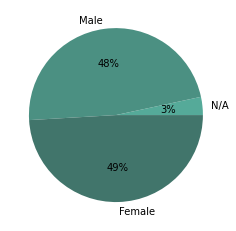

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [393, 5550, 5728]
labels = ['N/A', 'Male', 'Female']

#define Seaborn color palette to use
colors = sns.color_palette("dark:#5A9_r")[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')#, autopct='%.0f%%'
plt.show()

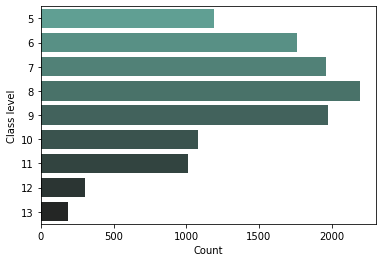

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = {'Class level': ['5', '6', '7','8','9','10','11','12', '13'],
'Count':[1189, 1765, 1959, 2194, 1976, 1084, 1015, 302, 187]}

df_new = pd.DataFrame(data)

#define Seaborn color palette to use
colors = sns.color_palette("dark:#5A9_r")[0:5]

#create pie chart
sns.barplot(data=df_new, x='Count', y='Class level',palette="dark:#5A9_r")
plt.show()

User Sätze nach Zeitverlauf

In [13]:
zeitstrahl = xmlsaetze[['ID','Datum','interventiongroup']]
zeitstrahl['Date'] = pd.to_datetime(zeitstrahl['Datum']).dt.date

zeitstrahl


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_5900\507716232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeitstrahl['Date'] = pd.to_datetime(zeitstrahl['Datum']).dt.date


,ID,Datum,interventiongroup,Date
0,267404286,2022-06-21 00:00:05,5,2022-06-21
1,267404289,2022-06-21 00:00:12,5,2022-06-21
2,267404292,2022-06-21 00:00:22,5,2022-06-21
3,267404297,2022-06-21 00:00:47,5,2022-06-21
4,267404305,2022-06-21 00:01:01,5,2022-06-21
...,...,...,...,...
959409,272312452,2022-10-30 23:50:11,2,2022-10-30
959410,272312454,2022-10-30 23:50:22,2,2022-10-30
959411,272312457,2022-10-30 23:50:29,2,2022-10-30
959412,272312462,2022-10-30 23:50:47,2,2022-10-30


In [14]:
temp = zeitstrahl.groupby(['Date','interventiongroup'])['ID'].count()
temp = temp.reset_index()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Count of submitted Tasks')]

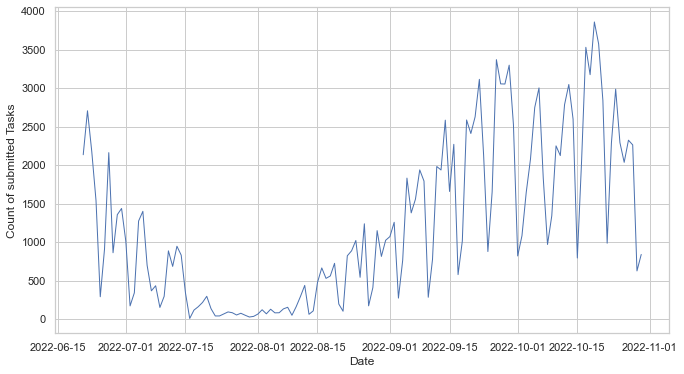

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(11,6))
gfg= sns.lineplot(data=temp, x='Date', y='ID', linewidth=1, palette="dark:#5A9_r" , ci=None)
gfg.set(xlabel ="Date", ylabel = "Count of submitted Tasks")

